In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta,norm


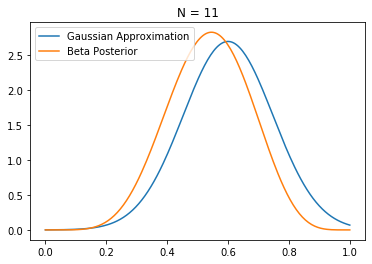

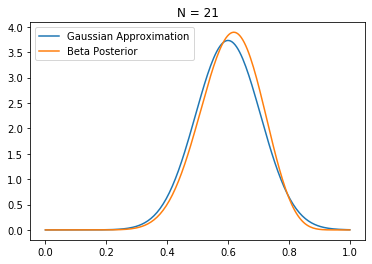

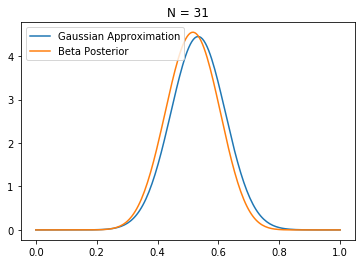

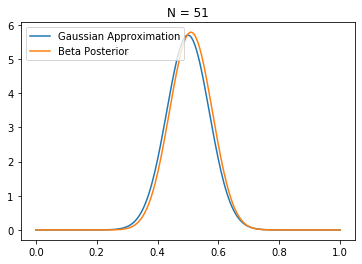

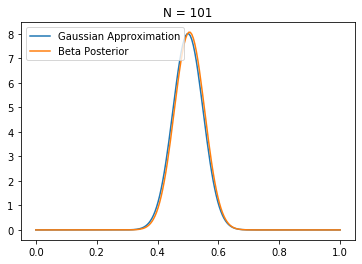

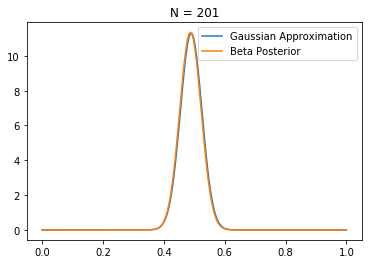

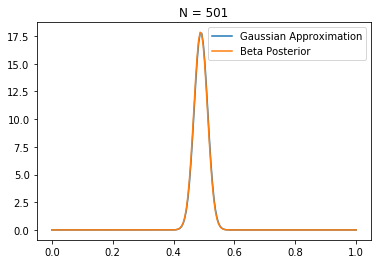

In [6]:
T = 501 # iterations
true_ctr = 0.5
a, b = 1,1 # uniform dist for data priors
plot_indices = (10, 20, 30, 50, 100, 200 ,500)
data = np.empty(T)
for i in range(T):
    x = 1 if np.random.random() < true_ctr else 0
    data[i] = x
    
    # update beta dist.
    a += x
    b += 1-x
    
    if i in plot_indices:
        p = data[:i].mean()
        n=i+1 # no. of samples
        std = np.sqrt(p*(1-p)/n)
            
         # PDF of Gaussian
        x = np.linspace(0, 1, 200)
        g = norm.pdf(x, loc = p, scale=std)
        plt.plot(x,g,label = 'Gaussian Approximation')
        
        posterior = beta.pdf(x, a=a,b=b)
        plt.plot(x,posterior, label = 'Beta Posterior')
        
        plt.legend()
        plt.title('N = %s' %n)
        plt.show()
        